# Statistical analysis of a consumer Dataset
- method used: descriptive statistics

### The following dimensions were examined:
- measures of central tendency: mean, median, mode, 25th/50th/75th percentiles
- measures of dispersion: standard deviation, range
- measures of association: correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stats_evaluation

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("customer_shopping_data.csv")

In [4]:
data.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
data.corr(numeric_only=True)

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


### Statistical evaluation for the entire dataset:

In [7]:
data_complete = stats_evaluation.stats(data)
print("The statistical analysis for the entire dataset:")
print(data_complete)

The statistical analysis for the entire dataset:
                 age      quantity         price
count   99457.000000  99457.000000  99457.000000
mean       43.427089      3.003429    689.256321
std        14.990054      1.413025    941.184567
min        18.000000      1.000000      5.230000
25%        30.000000      2.000000     45.450000
50%        43.000000      3.000000    203.300000
75%        56.000000      4.000000   1200.320000
max        69.000000      5.000000   5250.000000
median     43.000000      3.000000    203.300000
mode       37.000000      3.000000    600.160000
range      51.000000      4.000000   5244.770000


### Statistical evaluation for each shopping mall:

In [8]:
mall = list(data["shopping_mall"].unique())
print(mall)

['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall', 'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center']


In [10]:
for i in mall:
    mall_df = data[data["shopping_mall"] == i]
    mall_df = stats_evaluation.stats(mall_df)
    print("The statistical analysis for the shopping mall " + str(i) + ":")
    print(mall_df)
    print()

The statistical analysis for the shopping mall Kanyon:
                 age      quantity         price
count   19823.000000  19823.000000  19823.000000
mean       43.498966      2.999395    691.658944
std        14.952212      1.418310    951.995108
min        18.000000      1.000000      5.230000
25%        31.000000      2.000000     40.660000
50%        43.000000      3.000000    203.300000
75%        56.000000      4.000000   1200.320000
max        69.000000      5.000000   5250.000000
median     43.000000      3.000000    203.300000
mode       53.000000      3.000000    300.080000
range      51.000000      4.000000   5244.770000

The statistical analysis for the shopping mall Forum Istanbul:
                age     quantity        price
count   4947.000000  4947.000000  4947.000000
mean      43.537497     3.002224   674.363012
std       15.179075     1.419990   916.138978
min       18.000000     1.000000     5.230000
25%       30.000000     2.000000    40.660000
50%       44.0000

### Findings so far:
- the mode of the variables age, quantity, and price varies across shopping malls
- therefore, separate histograms will be created for each shopping center to visually compare these differences

#### To provide a baseline for comparison, the modes of the entire dataset are visualized first

Text(0, 0.5, 'Frequency')

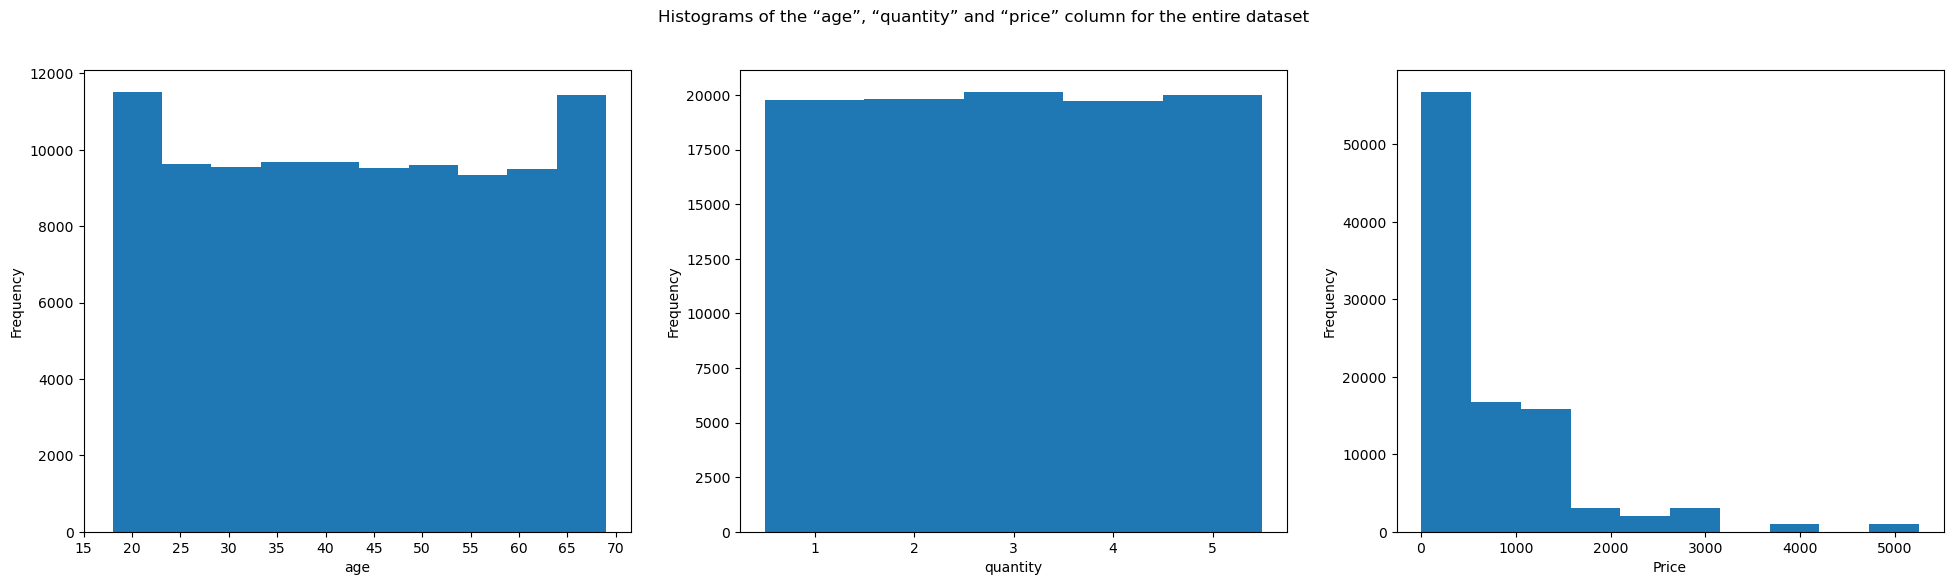

In [13]:
figur, achsen = plt.subplots(1,3, figsize=(24, 6), squeeze=False)
figur.suptitle("Histograms of the “age”, “quantity” and “price” column for the entire dataset")
index = 0
bins = np.arange(1, 7) - 0.5

achsen[0][0].hist(data["age"])
achsen[0][0].set_xticks(range(15,71,5),labels=range(15,71,5), size=10)
achsen[0][0].set_xlabel("age")
achsen[0][0].set_ylabel("Frequency")

achsen[0][1].hist(data["quantity"], bins=bins)
achsen[0][1].set_xticks(range(1,6,1),labels=range(1,6,1), size=10)
achsen[0][1].set_xlabel("quantity")
achsen[0][1].set_ylabel("Frequency")

achsen[0][2].hist(data["price"])
achsen[0][2].set_xticks(range(0,5250,1000),labels=range(0,5250,1000), size=10)
achsen[0][2].set_xlabel("Price")
achsen[0][2].set_ylabel("Frequency")

### Visualization of modes for each shopping center

#### For the column age

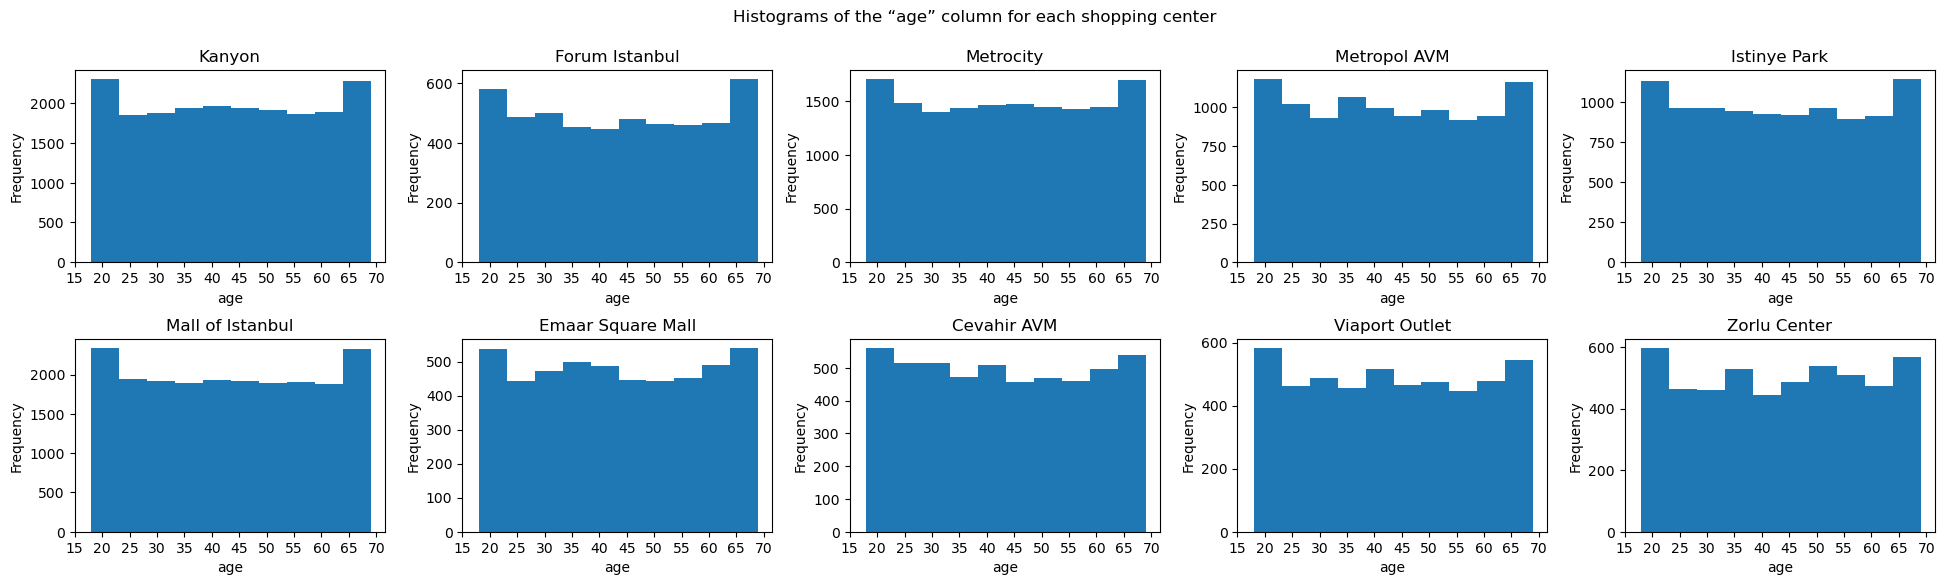

In [14]:
figur, achsen = plt.subplots(2,5, figsize=(24, 6), squeeze=False)
figur.suptitle("Histograms of the “age” column for each shopping center")
figur.subplots_adjust(wspace=0.25,hspace=0.4)
index = 0
for row in range(2):
    for col in range(5):
        mall_age = data[data["shopping_mall"] == mall[index]]
        achsen[row][col].hist(mall_age["age"])
        achsen[row][col].set_title(mall[index])
        achsen[row][col].set_xticks(range(15,71,5),labels=range(15,71,5), size=10)
        achsen[row][col].set_xlabel("age")
        achsen[row][col].set_ylabel("Frequency")
        index = index + 1

#### For the column quantity

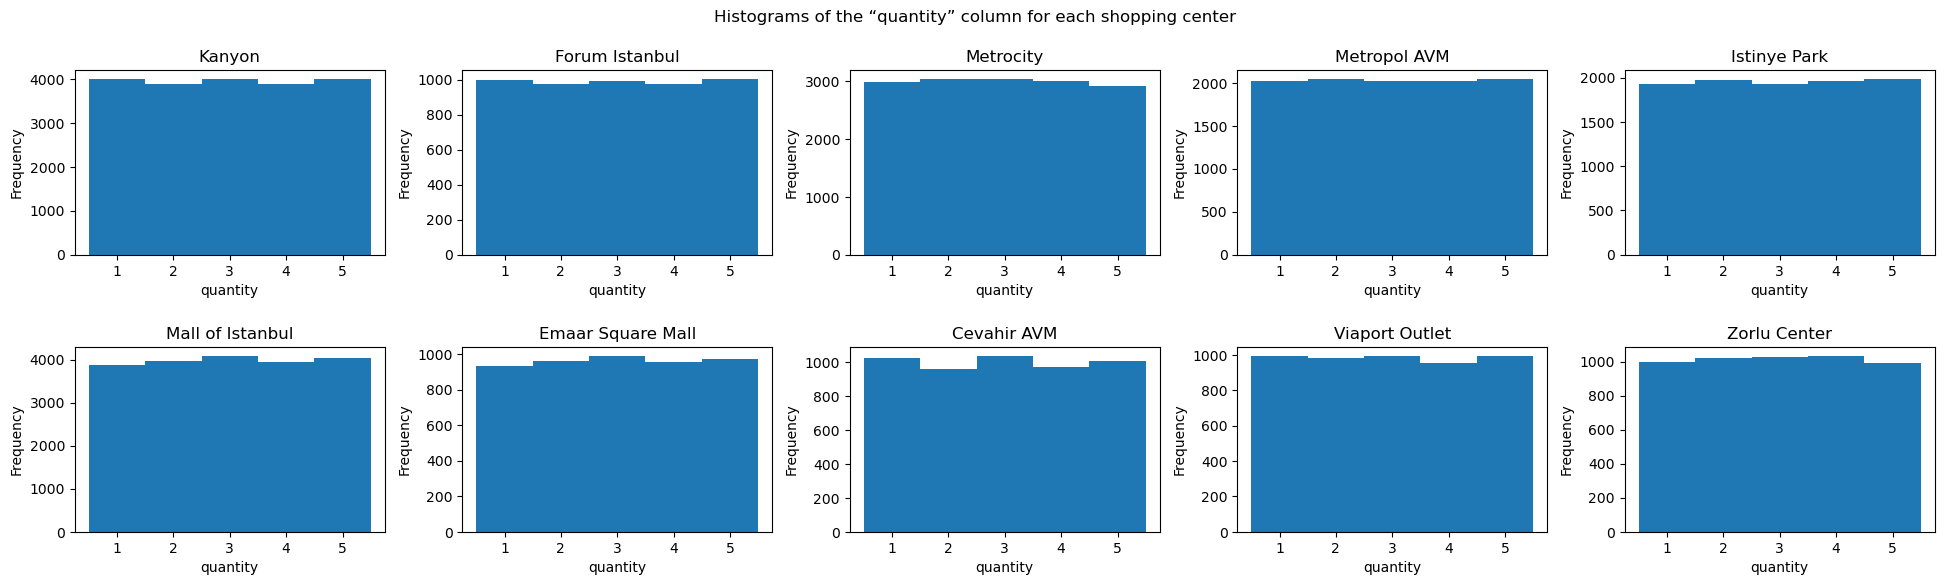

In [15]:
figur, achsen = plt.subplots(2,5, figsize=(24, 6), squeeze=False)
figur.suptitle("Histograms of the “quantity” column for each shopping center")
figur.subplots_adjust(wspace=0.25,hspace=0.5)
index = 0
for row in range(2):
    for col in range(5):
        mall_quantity = data[data["shopping_mall"] == mall[index]]
        achsen[row][col].hist(mall_quantity["quantity"], bins=bins)
        achsen[row][col].set_title(mall[index])
        achsen[row][col].set_xticks(range(1,6,1),labels=range(1,6,1), size=10)
        achsen[row][col].set_xlabel("quantity")
        achsen[row][col].set_ylabel("Frequency")
        index = index + 1

#### For the column price

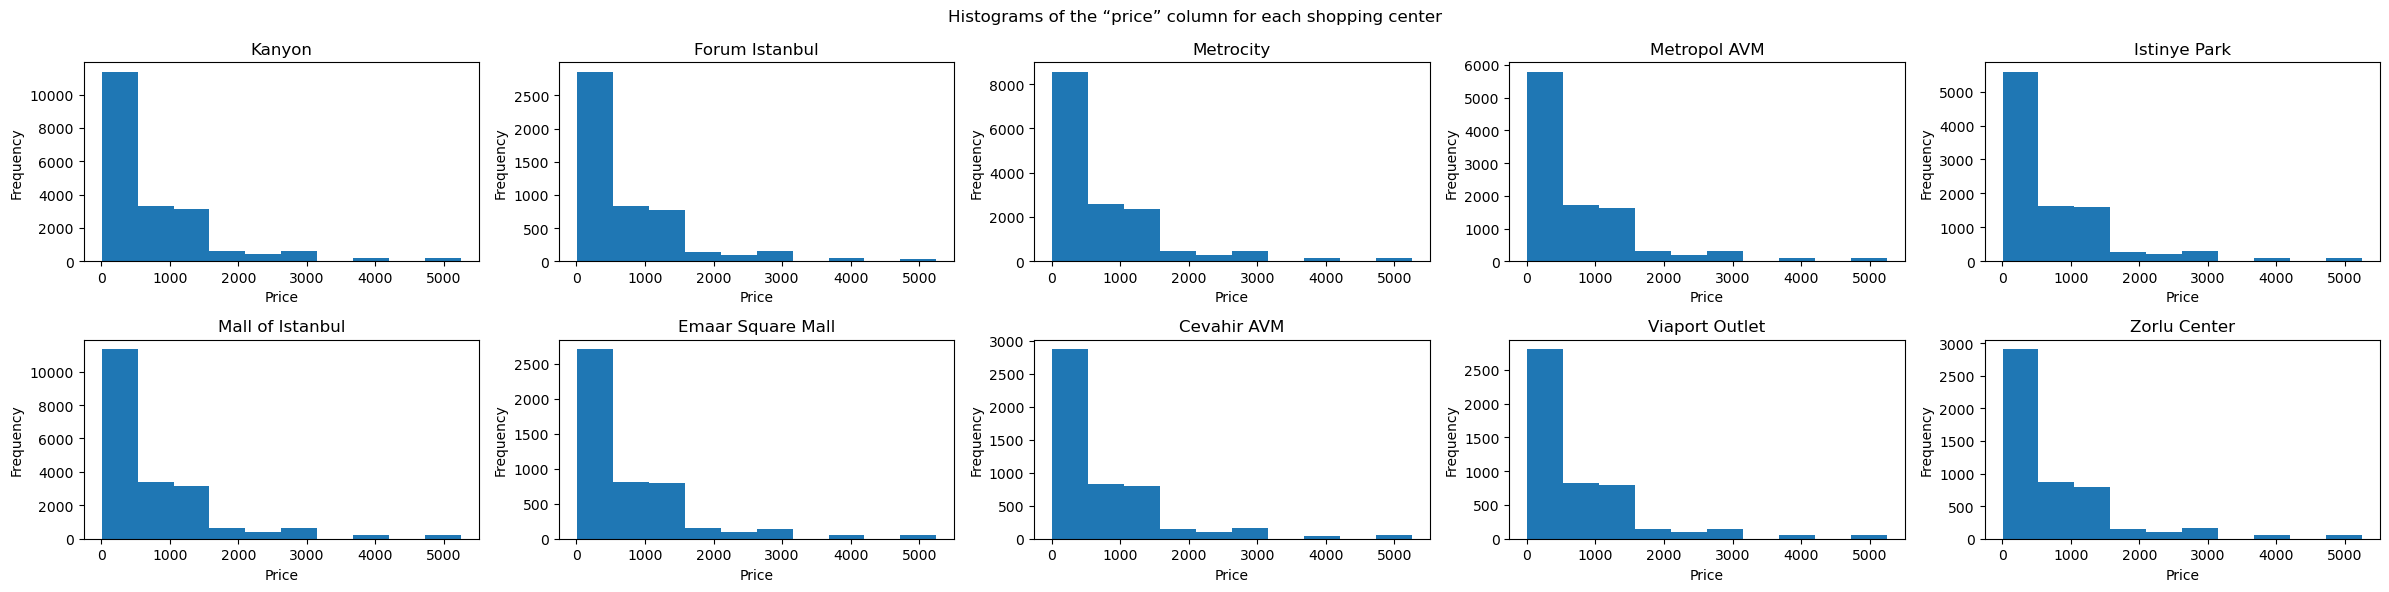

In [16]:
figur, achsen = plt.subplots(2,5, figsize=(24, 6), squeeze=False)
figur.suptitle("Histograms of the “price” column for each shopping center")
figur.subplots_adjust(wspace=0.25,hspace=0.4)
index = 0
for row in range(2):
    for col in range(5):
        mall_price = data[data["shopping_mall"] == mall[index]]
        achsen[row][col].hist(mall_price["price"])
        achsen[row][col].set_title(mall[index])
        achsen[row][col].set_xticks(range(0,5250,1000),labels=range(0,5250,1000), size=10)
        achsen[row][col].set_xlabel("Price")
        achsen[row][col].set_ylabel("Frequency")
        index = index + 1

plt.tight_layout()
plt.show()

# Findings
- The results of the descriptive statistical analysis indicate that the measures for each shopping mall are very similar to those of the entire dataset.